In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# load all the individual data files
data1 = pd.read_csv('combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1]) # 24058263
data2 = pd.read_csv('combined_data_2.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1]) # 26982302
data3 = pd.read_csv('combined_data_3.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1]) # 22605786
data4 = pd.read_csv('combined_data_4.txt', header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1]) # 26851926


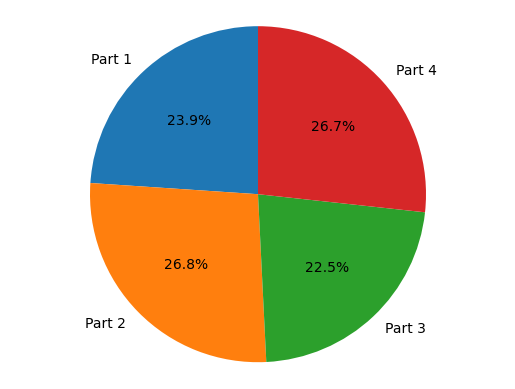

In [4]:
labels = ['Part 1', 'Part 2', 'Part 3', 'Part 4']

# colors = ['blue', 'yellow', 'green', 'orange']

sizes= [len(data1), len(data2), len(data3), len(data4)]

plt.pie(sizes,labels=labels, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

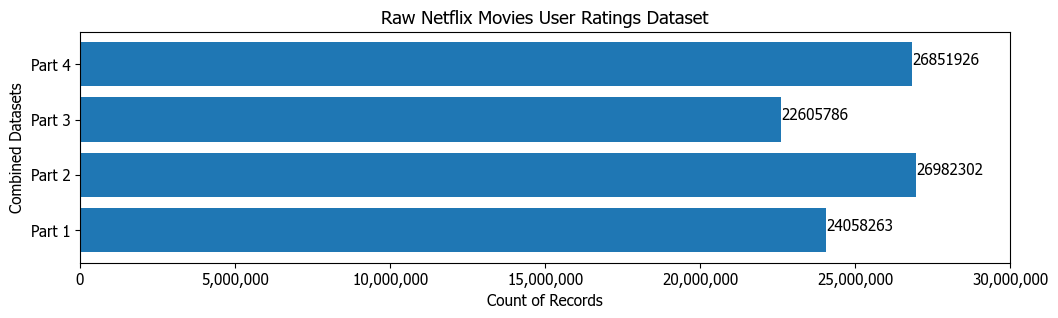

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(12, 3)

X = ['Part 1', 'Part 2', 'Part 3', 'Part 4']
Y = [len(data1), len(data2), len(data3), len(data4)]

plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
plt.rcParams.update({'font.size': 11})

plt.barh(X, Y)

# Add text labels
for index, value in enumerate(Y):
    plt.text(value, index, str(value))

plt.title('Raw Netflix Movies User Ratings Dataset')
plt.ylabel('Combined Datasets')
plt.xlabel('Count of Records')

# Get current tick locations and format labels correctly
ax = plt.gca()
ax.set_xticks(ax.get_xticks())  # Explicitly set tick locations
ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

plt.show()


In [8]:
 data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [9]:
data1.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [10]:

# Selecting duplicate rows except first occurrence based on all columns
duplicate_data1 = data1[data1.duplicated()]
duplicate_data1

,Cust_Id,Rating
580,636262,1.0
583,2439493,1.0
650,305344,1.0
672,1806515,3.0
674,387418,1.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [16]:
# remove duplicate records
dedup_data1 = data1.drop_duplicates(ignore_index=True) # 24058262 - 11889558 = 12168704
dedup_data1

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
1824050,438990,1.0
1824051,1498503,2.0
1824052,2541000,1.0
1824053,1999441,2.0


In [17]:
ls_data = [data1, data2, data3, data4] # 24058263 + 26982302 + 22605786 + 26851926 = 100498277
  
combined_data = pd.concat(ls_data, ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100498277 entries, 0 to 100498276
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 1.5+ GB


In [18]:
# remove duplicate records from combined dataset.  ---check if duplicates should not be remove?
dedup_combined_data = combined_data.drop_duplicates(ignore_index=True) # 2216698
dedup_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216698 entries, 0 to 2216697
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 33.8+ MB


Extract Movie_Ids from combined dataset and create new column

In [19]:

index_of_movieids = dedup_combined_data[(dedup_combined_data.Cust_Id.str.contains(':')) & (dedup_combined_data.isna().any(axis=1))]
index_of_movieids = index_of_movieids.reset_index()
index_of_movieids

,index,Cust_Id,Rating
0,0,1:,NaN
1,548,2:,NaN
2,688,3:,NaN
3,2688,4:,NaN
4,2826,5:,NaN
...,...,...,...
17765,2216645,17766:,NaN
17766,2216648,17767:,NaN
17767,2216650,17768:,NaN
17768,2216653,17769:,NaN


In [20]:
 index_of_movieids['index'][1:]

1            548
2            688
3           2688
4           2826
5           3938
          ...   
17765    2216645
17766    2216648
17767    2216650
17768    2216653
17769    2216694
Name: index, Length: 17769, dtype: int64

In [21]:
index_of_movieids['index'][:-1]

0              0
1            548
2            688
3           2688
4           2826
          ...   
17764    2216644
17765    2216645
17766    2216648
17767    2216650
17768    2216653
Name: index, Length: 17769, dtype: int64

In [22]:
# Create list of movie_id's using starting & ending index and fill the values accordingly

ls_movie_id = []
fill_movieid_value = 1

for i,j in zip(index_of_movieids['index'][1:],index_of_movieids['index'][:-1]):
    x = np.full((1,i-j-1), fill_movieid_value) 
    ls_movie_id = np.append(ls_movie_id, x)
    fill_movieid_value += 1
last_row = np.full((1,len(dedup_combined_data) - index_of_movieids.iloc[-1, 0] - 1), fill_movieid_value)
ls_movie_id = np.append(ls_movie_id, last_row)
len(ls_movie_id) # Should be equal to Number of rows in combined dataset

2198928

In [23]:
# drop the rows having NaN or Null values
dedup_NotNull_combined_data = dedup_combined_data.copy()
dedup_NotNull_combined_data = dedup_NotNull_combined_data.dropna() # drop nan values # 2216694 - 17770 = 2198928
dedup_NotNull_combined_data = dedup_NotNull_combined_data.reset_index(drop = True) # reset the indices

# add Movie_Id column with values derived previously
customer_ratings_data = dedup_NotNull_combined_data.copy()
customer_ratings_data['Movie_Id'] = ls_movie_id

# change datatypes of ID columns
# customer_ratings_data[['Cust_Id', 'Movie_Id']] = customer_ratings_data[['Cust_Id', 'Movie_Id']].apply(pd.to_numeric)
convert_datatypes = {'Cust_Id': int,'Movie_Id': int}
customer_ratings_data = customer_ratings_data.astype(convert_datatypes)
customer_ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198928 entries, 0 to 2198927
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int32  
dtypes: float64(1), int32(2)
memory usage: 33.6 MB


In [24]:

# check for null values
customer_ratings_data.isna().sum()

Cust_Id     0
Rating      0
Movie_Id    0
dtype: int64

In [25]:

# Unique values in dataset
customer_ratings_data.nunique()

Cust_Id     480189
Rating           5
Movie_Id     15283
dtype: int64

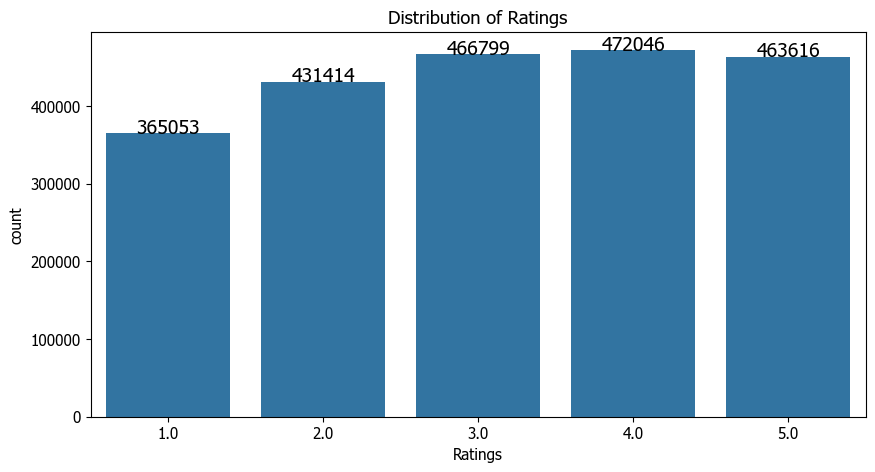

In [26]:
# No of records for each ratings
import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.countplot(data=customer_ratings_data, x='Rating')
labels = (customer_ratings_data['Rating'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [28]:
import pandas as pd
Movie_lookup = pd.read_csv('movie_title.csv', header = None, names = ['Movie_Id', 'Year', 'Movie_Name'], encoding='ISO-8859-1', usecols=[0,1,2], lineterminator='\n')
Movie_lookup

,Movie_Id,Year,Movie_Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [29]:
Movie_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie_Id    17770 non-null  int64  
 1   Year        17763 non-null  float64
 2   Movie_Name  17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


In [30]:
# check for NaN/Null values
Movie_lookup.isna().sum()

Movie_Id      0
Year          7
Movie_Name    0
dtype: int64

In [31]:
# replace NaN/Null with 0
Movie_lookup['Year'] = Movie_lookup['Year'].fillna(0)
# check for null values after converting nan/null to 0
Movie_lookup.isna().sum()

Movie_Id      0
Year          0
Movie_Name    0
dtype: int64

In [32]:

# change datatype for year
Movie_lookup['Year'] = Movie_lookup['Year'].astype(int)
Movie_lookup.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_Id    17770 non-null  int64 
 1   Year        17770 non-null  int32 
 2   Movie_Name  17770 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 347.2+ KB


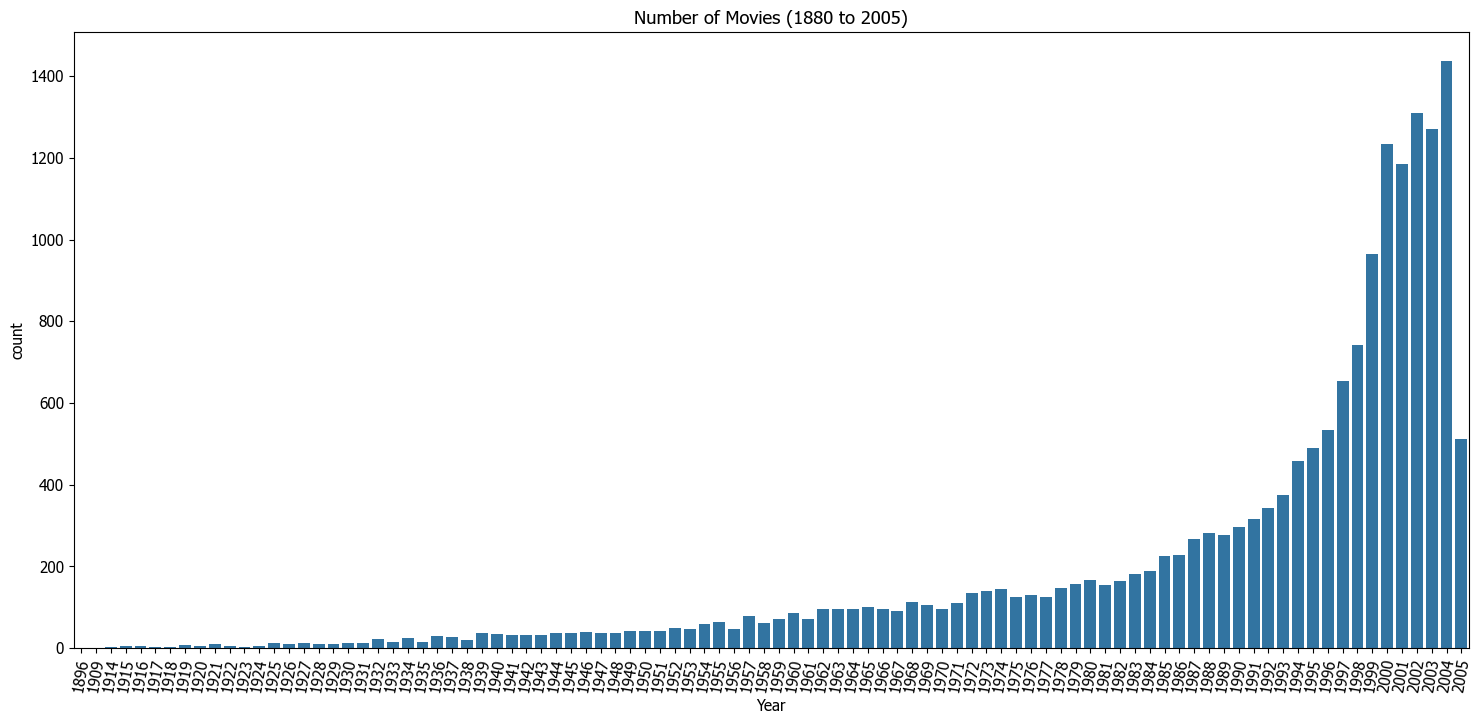

In [33]:
# Number of movies released per year
import seaborn as sns
plt.figure(figsize=(18,8))
sns.countplot(x ='Year', data = Movie_lookup[Movie_lookup['Year'] != 0])
plt.xticks(rotation = 80)
current_values = plt.gca().get_xticks()
# plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Number of Movies (1880 to 2005)')
plt.show()